<a href="https://colab.research.google.com/github/jmershov/SureStartFutureMakers/blob/main/Sarcasm_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
import matplotlib.pyplot as plt

In [3]:
#Load the dataset
df = pd.read_json("/content/gdrive/MyDrive/Dataset/Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


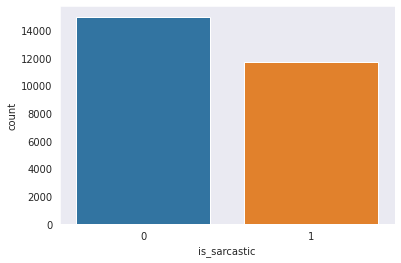

In [4]:
#Plot the class labels distribution
sns.set_style("dark")
sns.countplot(df.is_sarcastic)

In [5]:
#Print the number of data samples in each class
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [6]:
#Print total number of data samples
len(df.is_sarcastic)

26709

In [7]:
#Define X and Y
X = df.iloc[:,1]
Y = df.iloc[:,2]
print(Y)

0        0
1        0
2        1
3        1
4        0
        ..
26704    0
26705    0
26706    0
26707    0
26708    0
Name: is_sarcastic, Length: 26709, dtype: int64


In [8]:
#Split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(len(X_train))
print(len(X_test))

21367
5342


In [9]:
#Data preprocessing
max_words = 1000
max_len = 150
tok = Tokenizer(num_words = max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen = max_len)
sequences_matrix.shape

(21367, 150)

In [10]:
sequences_matrix

array([[  0,   0,   0, ...,   4, 694,   2],
       [  0,   0,   0, ..., 258,   9,   3],
       [  0,   0,   0, ..., 156,   4, 788],
       ...,
       [  0,   0,   0, ..., 363,   2,  41],
       [  0,   0,   0, ..., 100,   4, 124],
       [  0,   0,   0, ...,  16,   3, 377]], dtype=int32)

In [11]:
np.amax(sequences_matrix)

999

In [12]:
# Create model
def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [13]:
# Compile model
model = RNN()
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [14]:
#Fit the model
history = model.fit(sequences_matrix, Y_train, batch_size=125, epochs=5, validation_split=0.1)

Epoch 1/5
154/154 [==============================] - 26s 45ms/step - loss: 0.5730 - accuracy: 0.6986 - val_loss: 0.4126 - val_accuracy: 0.8077
Epoch 2/5
154/154 [==============================] - 6s 38ms/step - loss: 0.3811 - accuracy: 0.8264 - val_loss: 0.4013 - val_accuracy: 0.8170
Epoch 3/5
154/154 [==============================] - 6s 38ms/step - loss: 0.3540 - accuracy: 0.8422 - val_loss: 0.4052 - val_accuracy: 0.8245
Epoch 4/5
154/154 [==============================] - 6s 38ms/step - loss: 0.3482 - accuracy: 0.8493 - val_loss: 0.4065 - val_accuracy: 0.8147
Epoch 5/5
154/154 [==============================] - 6s 38ms/step - loss: 0.3985 - accuracy: 0.8382 - val_loss: 0.3967 - val_accuracy: 0.8297


In [15]:
trainLoss = np.array(history.history['loss'])
validationLoss = np.array(history.history['val_loss'])
epochs = np.array(range(1, 6))

epochs.size
trainLoss.size

5

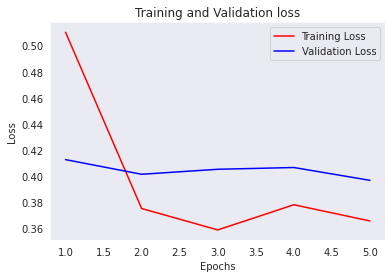

In [16]:
#Plot Loss Curves
plt.plot(epochs, trainLoss, 'r', label='Training Loss')
plt.plot(epochs, validationLoss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

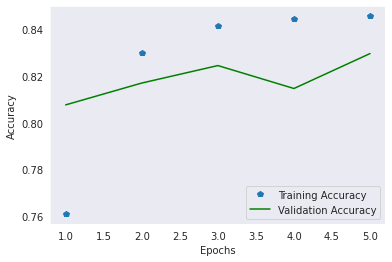

In [19]:
#Plot Accuracy Curves
trainAccuracy = np.array(history.history['accuracy'])
valAccuracy = np.array(history.history['val_accuracy'])
plt.plot(epochs, trainAccuracy, 'p', label='Training Accuracy')
plt.plot(epochs, valAccuracy, 'g', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
#Evaluate on test set
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)
test_sequences_matrix.shape

(5342, 150)

In [21]:
accr = model.evaluate(test_sequences_matrix, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

167/167 [==============================] - 2s 13ms/step - loss: 0.3891 - accuracy: 0.8210
Test set
  Loss: 0.389
  Accuracy: 0.821
